In [1]:
import gurobipy
import numpy as np
import matplotlib.pyplot as plt

[https://www.gurobi.com/](https://www.gurobi.com/) A really good optimization software used by companies like toyota, mercedes, basf etc.

## Generating problem instance...

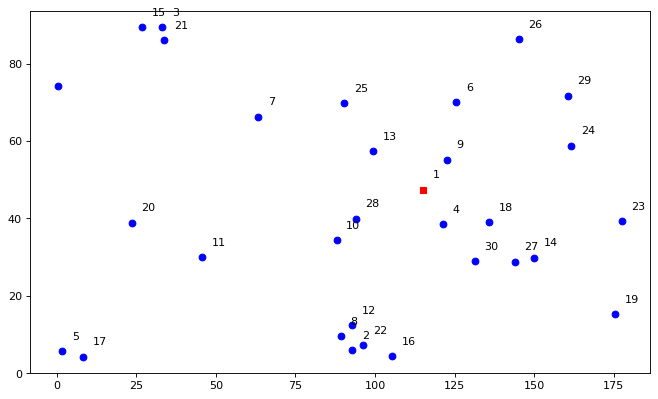

In [2]:
#Input Data
rnd = np.random
n = 30
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100
N = [i for i in range(1,n+1)]
V = [0] + N
A = [(i,j) for i in V for j in V if i != j]
c = {(i,j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i,j in A}
Q = 50
q = {i: rnd.randint(1,10) for i in N}
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c = 'b')


for i, txt in enumerate(q):
    plt.annotate(txt, (xc[i]+3, yc[i]+3))



## Building the mathematical model

In [3]:
from gurobipy import Model, GRB, quicksum

In [4]:
mdl = Model("CVRP")
mdl.setParam('TimeLimit', 30)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-03-22
Set parameter TimeLimit to value 30


In [5]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [6]:
mdl.modelSense = GRB.MINIMIZE

In [7]:
mdl.setObjective(quicksum(x[a]*c[a] for a in A))


min! $\sum_{i,j \in \mathcal{A}}  c_{i,j} \cdot d_{i,j}$ 

$\sum_{j \in \mathcal{V}, j \neq i}  x_{i,j} = 1 \;\; \forall i \in N $ 

$\sum_{j \in \mathcal{V}, j \neq i}  x_{i,j} = 1 \;\; \forall j \in N $ 

if $x_{i,j} \rightarrow u_i + q_j = u_j \,\,\, \forall  k \in \mathcal{K} ,t \in \mathcal{T}$

$q_i \leq u_i \leq Q \; \forall i \in N$

$x_{i,j} \in {0,1}$

In [8]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i)== 1 for i in N);
mdl.addConstrs(quicksum(x[i,j] for i in V if j!=i)== 1 for j in N);
mdl.addConstrs((x[i,j] == 1) >> (u[i] + q[i] == u[j])
              for i,j in A if i!=0 and j!=0);
mdl.addConstrs(u[i] >= q[i] for  i in N);
mdl.addConstrs(u[i] <= Q for i in N);

## Perform Solution procedure with gurobi

In [9]:
mdl.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 120 rows, 960 columns and 1860 nonzeros
Model fingerprint: 0x51920be1
Model has 870 general constraints
Variable types: 30 continuous, 930 integer (930 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 2039 rows and 397 columns
Presolve time: 0.16s
Presolved: 2159 rows, 1357 columns, 13097 nonzeros
Variable types: 427 continuous, 930 integer (930 binary)
Found heuristic solution: objective 3254.9416455

Root relaxation: objective 4.683619e+02, 146 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


In [10]:
active_arcs = [a for a in A if x[a].x > 0.99]

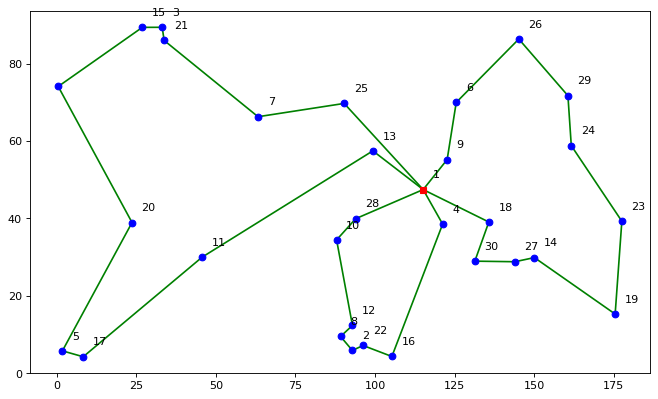

In [11]:
plt.figure(figsize=(10, 6), dpi=80)  
for i,j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
  
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

for i, txt in enumerate(q):
    plt.annotate(txt, (xc[i]+3, yc[i]+3))




In [12]:
def findEdgeByStartingNode(Node, li):
    for e in li:
        if(e[0] == Node):
            return e

In [13]:
active_arcs = [(0, 13),
 (0, 24),
 (0, 28),
 (1, 14),
 (2, 12),
 (3, 30),
 (4, 26),
 (5, 19),
 (6, 23),
 (7, 2),
 (8, 5),
 (9, 15),
 (10, 1),
 (11, 0),
 (12, 9),
 (13, 18),
 (14, 0),
 (15, 8),
 (16, 17),
 (17, 20),
 (18, 7),
 (19, 0),
 (20, 6),
 (21, 29),
 (22, 27),
 (23, 11),
 (24, 3),
 (25, 4),
 (26, 10),
 (27, 21),
 (28, 22),
 (29, 16),
 (30, 25)]

def GetRouteRemoveEdgesFromLi(startingEdge, li):
    x = startingEdge
    tour = []
    tour.append(startingEdge)
    
    while(True):
        x = findEdgeByStartingNode(x[1], li)
        tour.append(x)
        
        print(x)
        if(x[1] == 0):
            break
            
        li.pop(li.index(x))
    
    return tour

res = []

for i in range(0,3):
    res.append(GetRouteRemoveEdgesFromLi(active_arcs[i],active_arcs))

(13, 18)
(18, 7)
(7, 2)
(2, 12)
(12, 9)
(9, 15)
(15, 8)
(8, 5)
(5, 19)
(19, 0)
(24, 3)
(3, 30)
(30, 25)
(25, 4)
(4, 26)
(26, 10)
(10, 1)
(1, 14)
(14, 0)
(28, 22)
(22, 27)
(27, 21)
(21, 29)
(29, 16)
(16, 17)
(17, 20)
(20, 6)
(6, 23)
(23, 11)
(11, 0)


In [14]:
res[0]

[(0, 13),
 (13, 18),
 (18, 7),
 (7, 2),
 (2, 12),
 (12, 9),
 (9, 15),
 (15, 8),
 (8, 5),
 (5, 19),
 (19, 0)]